In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import tensorflow as tf
from google.colab import files
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import joblib



In [ ]:

# Définir les types de spills et leurs seuils de danger
spills = [
    {"type": "Pétrole", "seuil": 3000},
    {"type": "Gazole", "seuil": 2000},
    {"type": "Kérosène", "seuil": 2500},
    {"type": "Mazout", "seuil": 3500},
]

# Génération des données
data = []
for i in range(8000):  # Générer 8000 entrées
    spill = random.choice(spills)
    quantite = random.randint(500, 5000)
    zone = round(random.uniform(0.5, 5.0), 2)
    duree = random.randint(1, 72)
    seuil = spill["seuil"]
    danger = "Oui" if quantite > seuil else "Non"

    # Ajouter une entrée
    data.append({
        "ID": i + 1,
        "Type de Spill": spill["type"],
        "Quantité (L)": quantite,
        "Zone Affectée (km²)": zone,
        "Durée (heures)": duree,
        "Seuil de Danger (L)": seuil,
        "Danger": danger
    })

# Convertir en DataFrame
df = pd.DataFrame(data)

# Sauvegarder en CSV
df.to_csv("spill_dataset.csv", index=False)
print("Dataset généré et sauvegardé sous 'spill_dataset.csv'")


Dataset généré et sauvegardé sous 'spill_dataset.csv'


In [ ]:

# Lire le dataset et afficher les informations demandées
df_loaded = pd.read_csv("spill_dataset.csv")
print("\nEn-tête du dataset (5 premières lignes) :")
print(df_loaded.head())

print("\nInformations sur le dataset :")
print(f"Nombre de lignes : {df_loaded.shape[0]}")
print(f"Nombre de colonnes : {df_loaded.shape[1]}")



En-tête du dataset (5 premières lignes) :
   ID Type de Spill  Quantité (L)  Zone Affectée (km²)  Durée (heures)  \
0   1      Kérosène           522                 0.66              21   
1   2        Gazole          2572                 3.11              47   
2   3        Gazole          3699                 3.07              19   
3   4      Kérosène          2203                 2.31              10   
4   5        Mazout          3636                 4.49              51   

   Seuil de Danger (L) Danger  
0                 2500    Non  
1                 2000    Oui  
2                 2000    Oui  
3                 2500    Non  
4                 3500    Oui  

Informations sur le dataset :
Nombre de lignes : 8000
Nombre de colonnes : 7


In [ ]:
df_loaded.head()

,ID,Type de Spill,Quantité (L),Zone Affectée (km²),Durée (heures),Seuil de Danger (L),Danger
0,1,Kérosène,522,0.66,21,2500,Non
1,2,Gazole,2572,3.11,47,2000,Oui
2,3,Gazole,3699,3.07,19,2000,Oui
3,4,Kérosène,2203,2.31,10,2500,Non
4,5,Mazout,3636,4.49,51,3500,Oui


In [ ]:
df_loaded.describe()

,ID,Quantité (L),Zone Affectée (km²),Durée (heures),Seuil de Danger (L)
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,2767.218125,2.766212,36.525625,2743.562500
std,2309.54541,1298.612570,1.296799,20.711578,561.914608
min,1.00000,500.000000,0.500000,1.000000,2000.000000
25%,2000.75000,1638.750000,1.640000,19.000000,2000.000000
50%,4000.50000,2773.500000,2.790000,37.000000,2500.000000
75%,6000.25000,3900.250000,3.870000,54.000000,3500.000000
max,8000.00000,5000.000000,5.000000,72.000000,3500.000000


In [ ]:
# Afficher toutes les valeurs uniques dans chaque feature
for column in df_loaded.columns:
    unique_values = df_loaded[column].unique()
    print(f"Feature: {column}, Unique values: {unique_values}")

Feature: ID, Unique values: [   1    2    3 ... 7998 7999 8000]
Feature: Type de Spill, Unique values: ['Kérosène' 'Gazole' 'Mazout' 'Pétrole']
Feature: Quantité (L), Unique values: [ 522 2572 3699 ...  666 2076 4129]
Feature: Zone Affectée (km²), Unique values: [0.66 3.11 3.07 2.31 4.49 4.59 4.27 2.85 4.8  2.33 3.42 4.06 2.56 3.25
 4.1  2.65 1.39 4.58 2.37 4.51 2.1  0.6  4.19 2.13 0.91 2.79 1.04 2.71
 0.83 4.23 1.58 3.75 2.05 3.59 4.16 3.28 1.55 4.33 2.62 1.99 3.61 4.74
 1.19 4.02 1.01 0.95 1.37 3.53 3.36 4.36 4.71 3.79 2.4  3.3  1.11 4.85
 1.02 4.15 1.75 4.99 2.95 4.42 4.45 2.52 1.   2.01 3.31 1.62 3.24 4.73
 3.33 4.91 4.62 4.39 0.92 2.16 3.22 2.07 4.84 3.72 0.96 1.18 0.65 1.31
 1.94 2.12 3.26 3.97 1.82 4.97 3.89 4.54 1.89 1.63 3.74 0.54 3.71 3.52
 4.32 2.9  3.84 3.15 2.19 3.92 2.86 1.14 3.56 4.72 4.92 4.25 4.5  0.63
 1.64 3.55 3.57 3.14 4.11 4.79 0.78 3.17 4.4  3.19 1.46 3.48 0.67 3.81
 3.18 3.08 4.26 2.8  1.43 4.34 1.87 4.81 3.1  0.53 1.83 2.22 4.31 4.04
 1.49 2.96 2.6  1.33 2.74 3

In [ ]:
# Afficher les types de données
print("\nTypes de données pour chaque colonne :")
print(df_loaded.dtypes)


Types de données pour chaque colonne :
ID                       int64
Type de Spill           object
Quantité (L)             int64
Zone Affectée (km²)    float64
Durée (heures)           int64
Seuil de Danger (L)      int64
Danger                  object
dtype: object


In [ ]:
# Vérifier les valeurs nulles
print("\nVérification des valeurs nulles dans le dataset :")
print(df_loaded.isnull().sum())


Vérification des valeurs nulles dans le dataset :
ID                     0
Type de Spill          0
Quantité (L)           0
Zone Affectée (km²)    0
Durée (heures)         0
Seuil de Danger (L)    0
Danger                 0
dtype: int64


In [ ]:
print(df['Quantité (L)'].unique())


[ 522 2572 3699 ...  666 2076 4129]


In [ ]:
print(df['Quantité (L)'].value_counts())

Quantité (L)
747     8
3917    8
4458    8
1234    7
2206    7
       ..
1384    1
4140    1
1230    1
1967    1
4129    1
Name: count, Length: 3726, dtype: int64


In [ ]:
print(df['Zone Affectée (km²)'].unique())


[0.66 3.11 3.07 2.31 4.49 4.59 4.27 2.85 4.8  2.33 3.42 4.06 2.56 3.25
 4.1  2.65 1.39 4.58 2.37 4.51 2.1  0.6  4.19 2.13 0.91 2.79 1.04 2.71
 0.83 4.23 1.58 3.75 2.05 3.59 4.16 3.28 1.55 4.33 2.62 1.99 3.61 4.74
 1.19 4.02 1.01 0.95 1.37 3.53 3.36 4.36 4.71 3.79 2.4  3.3  1.11 4.85
 1.02 4.15 1.75 4.99 2.95 4.42 4.45 2.52 1.   2.01 3.31 1.62 3.24 4.73
 3.33 4.91 4.62 4.39 0.92 2.16 3.22 2.07 4.84 3.72 0.96 1.18 0.65 1.31
 1.94 2.12 3.26 3.97 1.82 4.97 3.89 4.54 1.89 1.63 3.74 0.54 3.71 3.52
 4.32 2.9  3.84 3.15 2.19 3.92 2.86 1.14 3.56 4.72 4.92 4.25 4.5  0.63
 1.64 3.55 3.57 3.14 4.11 4.79 0.78 3.17 4.4  3.19 1.46 3.48 0.67 3.81
 3.18 3.08 4.26 2.8  1.43 4.34 1.87 4.81 3.1  0.53 1.83 2.22 4.31 4.04
 1.49 2.96 2.6  1.33 2.74 3.35 3.04 3.54 2.98 1.8  3.63 0.5  2.35 3.02
 0.85 3.16 3.87 1.86 1.5  1.29 3.21 4.55 1.54 3.51 2.47 1.74 4.87 1.95
 1.09 1.91 3.62 0.56 4.46 0.8  1.24 3.7  3.66 1.06 2.32 1.36 2.78 0.61
 2.38 1.51 1.68 3.58 3.91 1.6  2.69 2.23 0.55 1.77 4.14 1.76 2.36 2.06
 4.61 

In [ ]:
print(df['Zone Affectée (km²)'].value_counts())

Zone Affectée (km²)
3.78    30
3.80    30
1.87    30
0.78    29
0.76    29
        ..
0.51     7
2.96     7
1.79     6
0.50     6
4.82     6
Name: count, Length: 451, dtype: int64


In [ ]:
print(df['Durée (heures)'].unique())


[21 47 19 10 51 62 54 61 71  9 13 66 67 42 14  4 50 45  5 37 48 11 72  1
 60 28  7 18 41 27 58 63 57 22 68 24 16 55 33 32  8  2 65 59 39 35 64  6
 12 43 53 40 52 29 69 46 38 44 34 36 70 25 20 23 56 49  3 31 26 15 30 17]


In [ ]:
print(df['Durée (heures)'].value_counts())

Durée (heures)
20    134
28    132
29    130
64    129
68    128
     ... 
11     92
40     92
2      91
58     89
55     89
Name: count, Length: 72, dtype: int64


In [ ]:

print(df['Seuil de Danger (L)'].unique())


[2500 2000 3500 3000]


In [ ]:
print(df['Seuil de Danger (L)'].value_counts())

Seuil de Danger (L)
2000    2045
2500    2020
3500    2007
3000    1928
Name: count, dtype: int64



Matrice de corrélation :
                           ID  Quantité (L)  Zone Affectée (km²)  \
ID                   1.000000      0.003943            -0.014716   
Quantité (L)         0.003943      1.000000             0.013934   
Zone Affectée (km²) -0.014716      0.013934             1.000000   
Durée (heures)       0.001355     -0.007262             0.023281   
Seuil de Danger (L)  0.003662      0.004574             0.004457   

                     Durée (heures)  Seuil de Danger (L)  
ID                         0.001355             0.003662  
Quantité (L)              -0.007262             0.004574  
Zone Affectée (km²)        0.023281             0.004457  
Durée (heures)             1.000000            -0.008757  
Seuil de Danger (L)       -0.008757             1.000000  


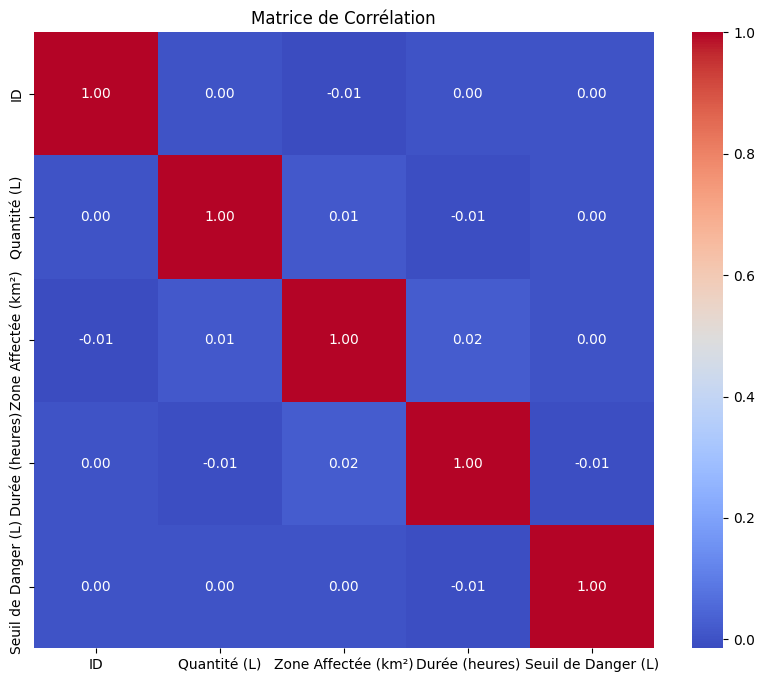

In [ ]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = df_loaded.select_dtypes(include=["number"])

# Calculer la matrice de corrélation
correlation_matrix = numeric_columns.corr()

# Afficher la matrice de corrélation
print("\nMatrice de corrélation :")
print(correlation_matrix)

# Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()


In [ ]:

# Charger le dataset
df = pd.read_csv("spill_dataset.csv")

# Compter les occurrences de chaque valeur dans la colonne "Danger"
danger_counts = df["Danger"].value_counts()

# Afficher les résultats
print("\nNombre de 'Oui' et 'Non' dans la colonne 'Danger' :")
print(danger_counts)




Nombre de 'Oui' et 'Non' dans la colonne 'Danger' :
Danger
Oui    4076
Non    3924
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


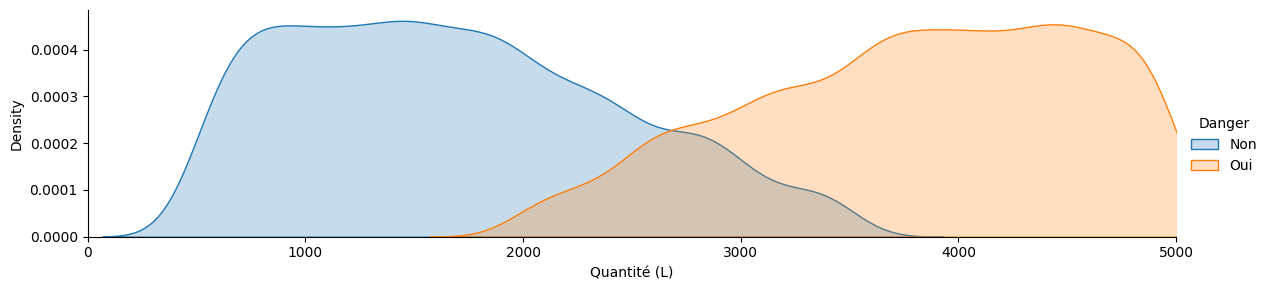

In [ ]:

facet = sns.FacetGrid(df_loaded, hue="Danger",aspect=4)
facet.map(sns.kdeplot,'Quantité (L)',shade= True)
facet.set(xlim=(0, df_loaded['Quantité (L)'].max()))
facet.add_legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


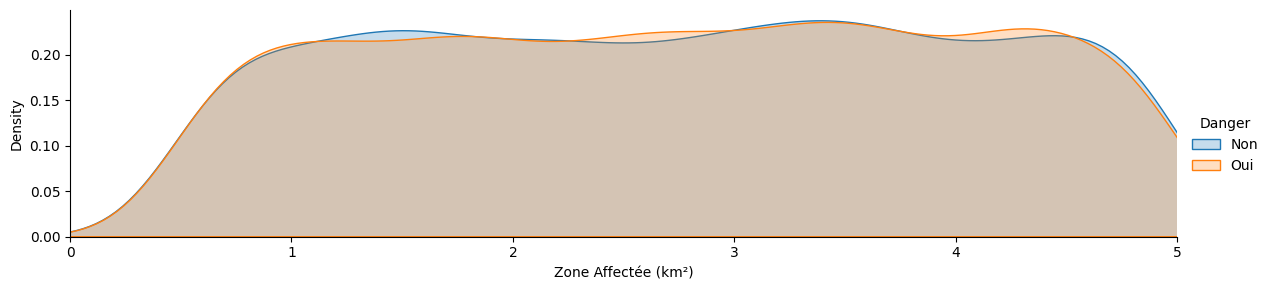

In [ ]:
facet = sns.FacetGrid(df_loaded, hue="Danger",aspect=4)
facet.map(sns.kdeplot,'Zone Affectée (km²)',shade= True)
facet.set(xlim=(0, df_loaded['Zone Affectée (km²)'].max()))
facet.add_legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


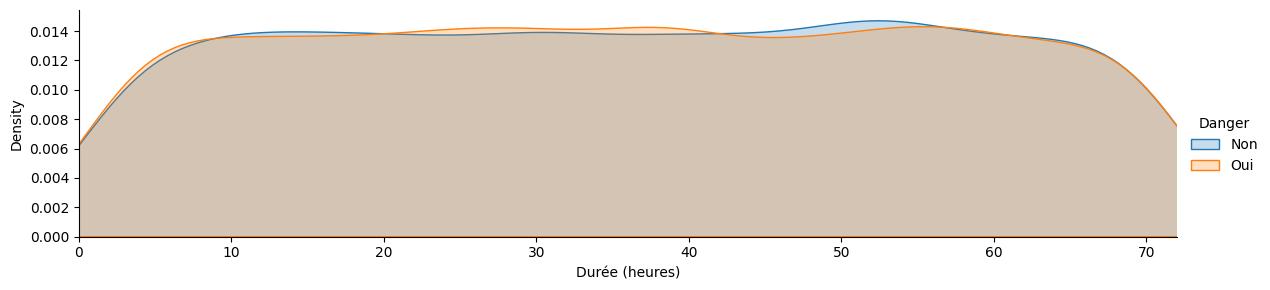

In [ ]:
facet = sns.FacetGrid(df_loaded, hue="Danger",aspect=4)
facet.map(sns.kdeplot,'Durée (heures)',shade= True)
facet.set(xlim=(0, df_loaded['Durée (heures)'].max()))
facet.add_legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


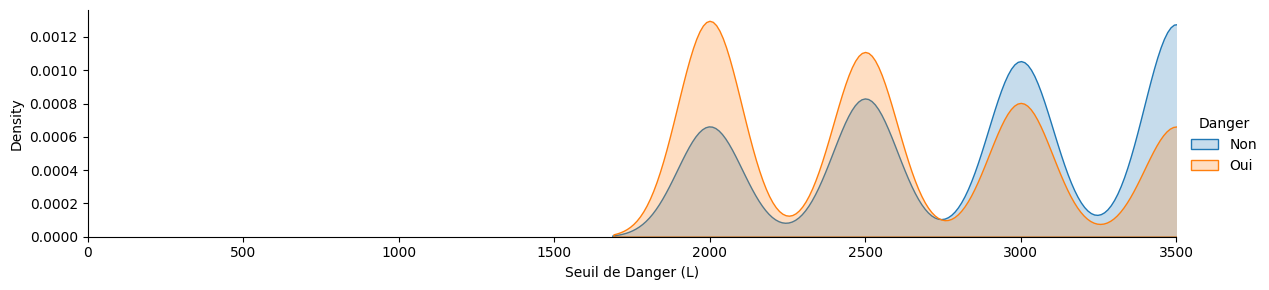

In [ ]:
facet = sns.FacetGrid(df_loaded, hue="Danger",aspect=4)
facet.map(sns.kdeplot,'Seuil de Danger (L)',shade= True)
facet.set(xlim=(0, df_loaded['Seuil de Danger (L)'].max()))
facet.add_legend()

plt.show()

In [ ]:


# Fonction pour créer un diagramme à barres empilées
def bar_chart(feature):
    # Séparer les données en fonction du statut de danger
    danger_yes = df[df['Danger'] == 'Oui'][feature].value_counts()
    danger_no = df[df['Danger'] == 'Non'][feature].value_counts()

    # Créer un DataFrame avec les valeurs comptées
    data = pd.DataFrame([danger_yes, danger_no])
    data.index = ['Danger Oui', 'Danger Non']

    # Tracer le diagramme à barres empilées
    data.plot(kind='bar', stacked=True, figsize=(10,5), colormap='coolwarm')

    # Ajouter un titre et des labels
    plt.title(f"Répartition de {feature} en fonction du statut de danger")
    plt.xlabel(f"{feature}")
    plt.ylabel('Nombre d\'occurrences')
    plt.xticks(rotation=0)

    # Afficher le graphique
    plt.show()




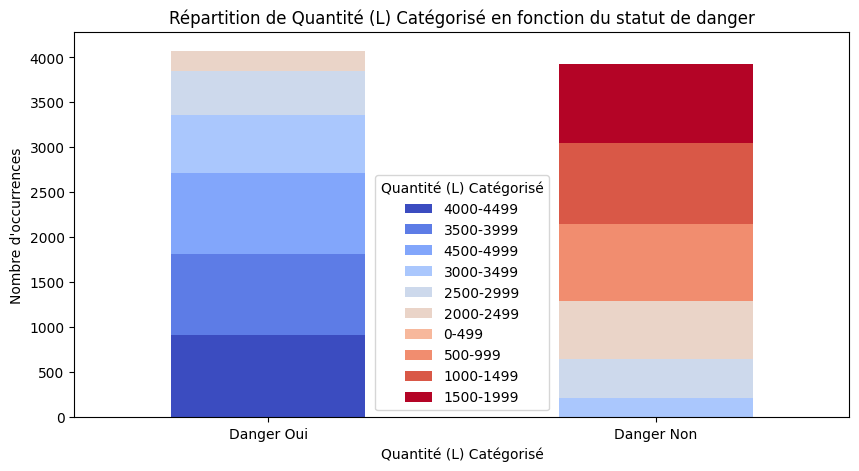

In [ ]:
# Regrouper les quantités en intervalles de 500 litres
df['Quantité (L) Catégorisé'] = pd.cut(df['Quantité (L)'], bins=range(0, 5001, 500),
                                        labels=[f'{i}-{i+499}' for i in range(0, 5000, 500)])

# Tracer le graphique à barres pour les quantités catégorisées
bar_chart('Quantité (L) Catégorisé')


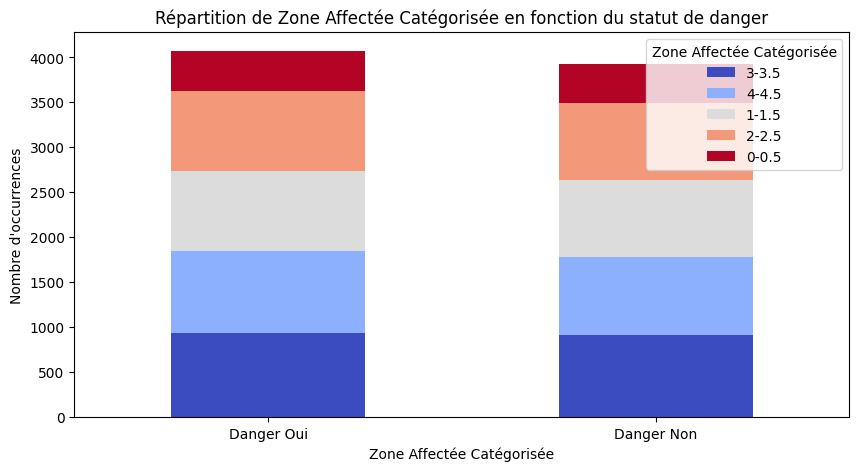

In [ ]:
# Regrouper les zones en intervalles de 0.5 km²
df['Zone Affectée Catégorisée'] = pd.cut(df['Zone Affectée (km²)'], bins=range(0, 6, 1),
                                          labels=[f'{i}-{i+0.5}' for i in range(0, 5)])

# Tracer le graphique à barres pour les zones affectées catégorisées
bar_chart('Zone Affectée Catégorisée')


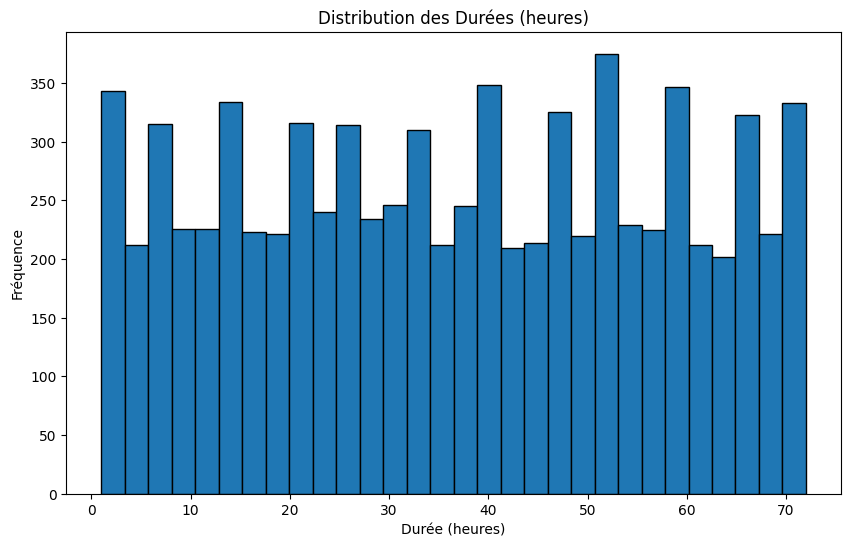

In [ ]:
# Tracer l'histogramme des durées
plt.figure(figsize=(10, 6))
plt.hist(df['Durée (heures)'], bins=30, edgecolor='black')
plt.title('Distribution des Durées (heures)')
plt.xlabel('Durée (heures)')
plt.ylabel('Fréquence')
plt.show()


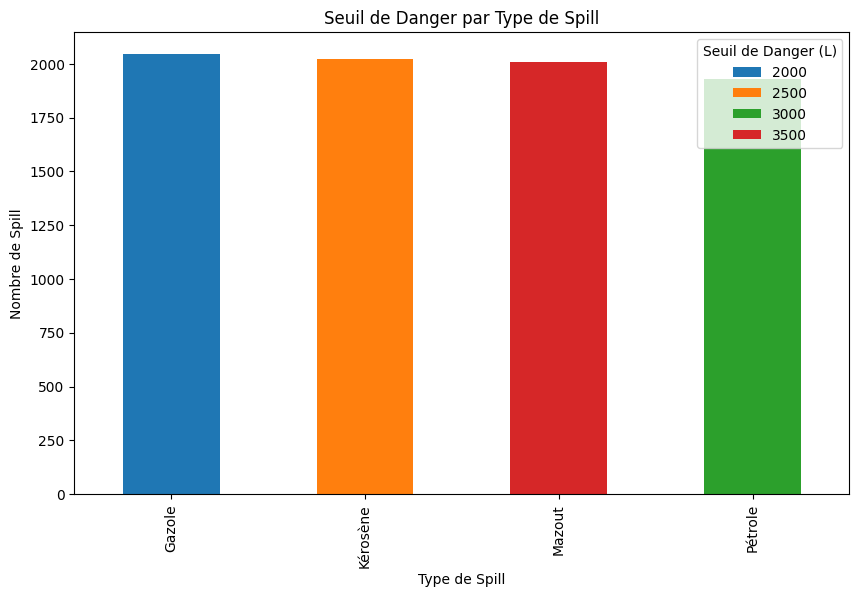

In [ ]:
# Tracer le graphique à barres empilées pour les seuils de danger par type de spill
df_seuils = df.groupby(['Type de Spill', 'Seuil de Danger (L)']).size().unstack()
df_seuils.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Seuil de Danger par Type de Spill')
plt.xlabel('Type de Spill')
plt.ylabel('Nombre de Spill')
plt.show()


In [ ]:

# Télécharger le fichier
files.download("spill_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Charger le dataset
df = pd.read_csv("spill_dataset.csv")

# Encoder la colonne de danger (binaire : Oui ou Non)
le_danger = LabelEncoder()
df["Danger"] = le_danger.fit_transform(df["Danger"])

# Séparer les features et le label
X = df[["Quantité (L)", "Zone Affectée (km²)", "Durée (heures)"]]
y_danger = df["Danger"]  # Pour prédire si le spill est dangereux

# Diviser les données en jeux d'entraînement et de test
X_train, X_test, y_danger_train, y_danger_test = train_test_split(X, y_danger, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle Keras pour la classification binaire
input_dim = X_train.shape[1]
inputs = tf.keras.layers.Input(shape=(input_dim,))

# Couche cachée
hidden = tf.keras.layers.Dense(128, activation="relu")(inputs)
hidden = tf.keras.layers.Dense(64, activation="relu")(hidden)

# Sortie pour le danger (classification binaire)
output_danger = tf.keras.layers.Dense(1, activation="sigmoid", name="danger")(hidden)

# Modèle final
model = tf.keras.Model(inputs=inputs, outputs=output_danger)

# Compilation du modèle
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Entraîner le modèle
history = model.fit(
    X_train_scaled,
    y_danger_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32
)

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test_scaled, y_danger_test)
print("Evaluation du modèle :")
print(f"Loss: {loss}, Accuracy: {accuracy}")


Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8399 - loss: 0.4109 - val_accuracy: 0.8719 - val_loss: 0.2543
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8792 - loss: 0.2356 - val_accuracy: 0.8828 - val_loss: 0.2401
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8849 - loss: 0.2393 - val_accuracy: 0.8844 - val_loss: 0.2394
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8720 - loss: 0.2476 - val_accuracy: 0.8789 - val_loss: 0.2457
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8838 - loss: 0.2359 - val_accuracy: 0.8727 - val_loss: 0.2483
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8870 - loss: 0.2305 - val_accuracy: 0.8828 - val_loss: 0.2421
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8740 - loss: 0.2433 - val_accuracy: 0.8859 - val_loss: 0.2392
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8872 - loss: 0.2204 - val_accuracy: 0.

In [ ]:

# Convertir le modèle en TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Sauvegarder le modèle TFLite dans un fichier local sur Colab
tflite_filename = "model_danger_classification.tflite"
with open(tflite_filename, "wb") as f:
    f.write(tflite_model)

# Télécharger le modèle sur votre PC
files.download(tflite_filename)


Saved artifact at '/tmp/tmpt0sk92zi'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  131992565046032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131992492737984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131992495102032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131992493945632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131992493123968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131992493293088: TensorSpec(shape=(), dtype=tf.resource, name=None)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Nouvelle observation (exemple)
nouvelle_observation = {
    "Quantité (L)": 3346,  # Exemple : 3500 L
    "Zone Affectée (km²)": 2.25,  # Exemple : 3.5 km²
    "Durée (heures)": 72  # Exemple : 12 heures
}

# Convertir en DataFrame pour manipulations
input_df = pd.DataFrame([nouvelle_observation])

# Normaliser les données en utilisant le scaler ajusté
input_scaled = scaler.transform(input_df)

# Faire une prédiction avec le modèle
probabilite = model.predict(input_scaled)

# Interpréter la sortie
resultat = "Oui" if probabilite[0] > 0.5 else "Non"
print(f"Prédiction pour le danger : {resultat} (Probabilité : {probabilite[0][0]:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Prédiction pour le danger : Oui (Probabilité : 0.71)


In [ ]:
model.save("model_danger_classification.keras")


In [ ]:

model = load_model("model_danger_classification.keras", compile=False)


In [ ]:

# Télécharger le fichier Keras
files.download("/content/model_danger_classification.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Charger le modèle Keras
model = tf.keras.models.load_model('/content/model_danger_classification.keras')

# Convertir en modèle TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Sauvegarder le modèle TFLite
with open('/content/model_danger_classification.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpliskk0ni'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  131991614914624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131991614923600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131991614924656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131991614925184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131991614927648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131991614924480: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:

# Exemple de données d'entraînement
data = {
    "Quantité (L)": [1000, 2000, 3000, 4000, 5000],
    "Zone Affectée (km²)": [1.0, 2.0, 3.0, 4.0, 5.0],
    "Durée (heures)": [10, 20, 30, 40, 50]
}

# Créer un DataFrame
df = pd.DataFrame(data)

# Créer et ajuster le scaler
scaler = StandardScaler()
scaler.fit(df)

# Sauvegarder le scaler
joblib.dump(scaler, 'scaler.pkl')  # Enregistrez le scaler dans le répertoire courant


['scaler.pkl']

In [ ]:

files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>